### Download OGBench Datasets

In [1]:
"""
Please install the CompDiffuser customized OGBench github repo first.

You can use this file to download offical OGBench datasets, curated by 
https://seohong.me/projects/ogbench/

Check this file in OGBench folder 'ogbench/utils.py' to modify the default download path.
The default path is < DEFAULT_DATASET_DIR = '~/.ogbench/data' >

This file is based on the code in the Official OGBench github repo.
"""

import ogbench, os
## 'egl' needs a GPU
os.environ['PYOPENGL_PLATFORM'] = 'egl'
os.environ['MUJOCO_GL'] = 'egl'

## 'osmesa' cpu rendering
os.environ['PYOPENGL_PLATFORM'] = 'osmesa'
os.environ['MUJOCO_GL'] = 'osmesa'



## which dataset to download
dataset_name = 'antmaze-giant-stitch-v0'
# dataset_name = 'humanoidmaze-medium-stitch-v0'
# dataset_name = 'humanoidmaze-large-stitch-v0'
# dataset_name = 'antsoccer-arena-stitch-v0'
# dataset_name = 'antsoccer-medium-stitch-v0'

env, train_dataset, val_dataset = ogbench.make_env_and_datasets(dataset_name)

# Train your offline goal-conditioned RL agent on the dataset.
# ...

# Evaluate the agent.
# for task_id in [1, 2, 3, 4, 5]:
for task_id in [1,]:
    # Reset the environment and set the evaluation task.
    ob, info = env.reset(
        options=dict(
            task_id=task_id,  # Set the evaluation task. Each environment provides five
                              # evaluation goals, and `task_id` must be in [1, 5].
            render_goal=True,  # Set to `True` to get a rendered goal image (optional).
        )
    )

    goal = info['goal']  # Get the goal observation to pass to the agent.
    goal_rendered = info['goal_rendered']  # Get the rendered goal image (optional).

    done = False
    imgs = []
    # while not done:
    for _ in range(10):
        action = env.action_space.sample()  # Replace this with your agent's action.
        ob, reward, terminated, truncated, info = env.step(action)  # Gymnasium-style step.
        # If the agent reaches the goal, `terminated` will be `True`. If the episode length
        # exceeds the maximum length without reaching the goal, `truncated` will be `True`.
        # `reward` is 1 if the agent reaches the goal and 0 otherwise.
        done = terminated or truncated
        frame = env.render()  # Render the current frame (optional).
        imgs.append(frame)

    success = info['success']  # Whether the agent reached the goal (0 or 1).
                               # `terminated` also indicates this.
# del env

[OGBench Repo] Call: make_env_and_datasets(), make gymna env
loco_env_class=<class 'ogbench.locomaze.ant.AntEnv'>
[OgB MazeEnv] call reset (for goal) args=() kwargs={} 


antmaze-giant-stitch-v0.npz: 100%|██████████| 234M/234M [00:12<00:00, 19.1MB/s] 


antmaze-giant-stitch-v0-val.npz: 100%|██████████| 23.4M/23.4M [00:01<00:00, 24.3MB/s]


[OgB MazeEnv] call reset (for goal) args=() kwargs={} 


#### render

imgs[0].shape=(200, 168, 3)


""

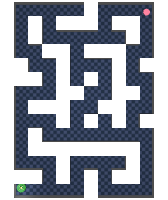

[OgB MazeEnv] call reset (for goal) args=() kwargs={} 


In [4]:
import mediapy as mpy
import numpy as np
# mpy.show_images(imgs)
# mpy.show_video(imgs)
print( f'{imgs[0].shape=}' )
imgs[0].min()
mpy.show_image(imgs[0])
task_id = 2
ob, info = env.reset(options=dict( task_id=task_id, render_goal=True ,) , )
img = env.render()
# env.render_mode
# mpy.show_image(env.render())
# mpy.show_image( info['goal_rendered'] )
# env.close()


In [11]:
import os
dataset_path = '~/.ogbench/data/antmaze-giant-stitch-v0.npz'
dataset_path_2 = os.path.expanduser(dataset_path)
print(f'{dataset_path=}\n{dataset_path_2=}')
print( os.path.exists(dataset_path) )
print( os.path.exists(dataset_path_2) )

dataset_path='~/.ogbench/data/antmaze-giant-stitch-v0.npz'
dataset_path_2='/nethome/yluo470/.ogbench/data/antmaze-giant-stitch-v0.npz'
False
True


In [13]:
os.path.expanduser(dataset_path_2) == dataset_path_2

True